<h1> Data Analytics Project </h1>

<h3> United Kingdom Road Accident Data Analysis </h3>
<h3> Inclusive Years: 2019 - 2022 </h3>
<p> Analyst: Bianca Sophia S. Roxas <p>

In [6]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [8]:
accident = pd.read_csv('datasets\\accident_data.csv')

In [9]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18/02/2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21/02/2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23/02/2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23/02/2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h1> Data Preparation </h1>

In [10]:
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

<h1>Data Cleansing</h1>
<h3>Filling out null values</h3>

In [11]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [12]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna('Unknown surface condition')
accident['Road_Type'] = accident['Road_Type'].fillna('unaccounted')
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('unaccounted')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])

In [13]:
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [14]:
accident['Index'] = accident['Index'].astype('category')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['District Area'] = accident['District Area'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')

In [15]:
accident.dtypes

Index                      category
Accident_Severity            object
Accident Date                object
Latitude                    float64
Light_Conditions           category
District Area              category
Longitude                   float64
Number_of_Casualties          int64
Number_of_Vehicles            int64
Road_Surface_Conditions    category
Road_Type                  category
Urban_or_Rural_Area        category
Weather_Conditions           object
Vehicle_Type               category
dtype: object

<h1>Categorical Fields</h1>

In [16]:
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')
accident['Latitude'] = accident['Latitude'].astype('category')
accident['Longitude'] = accident['Longitude'].astype('category')
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')

In [17]:
accident.dtypes

Index                      category
Accident_Severity          category
Accident Date                object
Latitude                   category
Light_Conditions           category
District Area              category
Longitude                  category
Number_of_Casualties          int64
Number_of_Vehicles            int64
Road_Surface_Conditions    category
Road_Type                  category
Urban_or_Rural_Area        category
Weather_Conditions         category
Vehicle_Type               category
dtype: object

<h1> Converting Object to DateTime Data Type </h1>

In [18]:
accident['Accident Date'] = accident['Accident Date'].astype('str')
accident['Accident Date'] = accident['Accident Date'].str.strip()
accident['Accident Date'] = accident['Accident Date'].str.replace('/', '-')

In [19]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')

<h1>Adjusting data types</h1>

In [20]:
accident.dtypes
# accident['Accident Date']

Index                            category
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                         category
Light_Conditions                 category
District Area                    category
Longitude                        category
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

<h1>Extraxting date information using pandas date time</h1>

In [21]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['Dayofweek'] = accident['Accident Date'].dt.dayofweek

In [22]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
Dayofweek                  0
dtype: int64

<h1>Data Analytics</h1>
<h3>Analyzing Each from the Data Set</h3>

<h1>Univariate</h1>

In [23]:
df_2019 = accident[accident['Year'] == 2019]

<h1>Univariate Analysis from year 2019</h1>

<h2>Question NO.1: How many incidents happened under light conditions?</h2>

In [24]:
print(f"total number of accident in 2019 is {df_2019['Light_Conditions'].value_counts().sum()}")
df_2019['Light_Conditions'].value_counts()

total number of accident in 2019 is 182115


Light_Conditions
Daylight                       133042
Darkness - lights lit           35769
Darkness - no lighting          10842
Darkness - lighting unknown      1768
Darkness - lights unlit           694
Name: count, dtype: int64

<h1> Insight 1 </h1>
<h3>  Accidents by Severity </h3>
<h5>What are the contributing factors to the severity of accidents in urban areas?</h5>

In [25]:

accidents = accident[(accident['Urban_or_Rural_Area'] == 'Urban') & 
                                   (accident['Accident_Severity'] == 'Serious')]
accidents


,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,Dayofweek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,5,2
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,2,1
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,unaccounted,Urban,unaccounted,Taxi/Private hire car,2019,8,26,0
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16,4
5,200701BS67159,Serious,2019-09-18,51.497750,Daylight,Kensington and Chelsea,-0.192556,2,3,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,9,18,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660005,201063DP04110,Serious,2022-02-24,51.766557,Daylight,Powys,-3.770561,1,2,Dry,Single carriageway,Urban,Fine no high winds,Motorcycle over 500cc,2022,2,24,3
660010,201063DP04610,Serious,2022-02-25,52.514121,Daylight,Powys,-3.316199,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2022,2,25,4
660066,201063DP10210,Serious,2022-05-01,51.767977,Darkness - lights lit,Powys,-3.777719,1,1,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2022,5,1,6
660104,201063DP14210,Serious,2022-05-18,51.767905,Daylight,Powys,-3.776556,1,3,Dry,Single carriageway,Urban,Fine no high winds,Car,2022,5,18,2


<h1> Insight 2 </h1>
<h3> One-way streets and roundabouts show a high number of slight accidents </h3>
<h5>What factors contribute to the higher number of slight accidents on one-way streets and roundabouts?</h5>

In [26]:
g = accident.groupby(['Accident_Severity', 'Weather_Conditions', 'Road_Type']).size()
print(g)


Accident_Severity  Weather_Conditions  Road_Type         
Fatal              Fine + high winds   Dual carriageway        32
                                       One way street           5
                                       Roundabout               5
                                       Single carriageway     133
                                       Slip road                0
                                                             ... 
Slight             unaccounted         One way street         298
                                       Roundabout            1161
                                       Single carriageway    8755
                                       Slip road              142
                                       unaccounted            831
Length: 162, dtype: int64


<h1> Insight 3 </h1>
<h3> How does the combination of weather condition, road type, and accident severity affect thr casualties in road accidents across different years?</h3>

In [27]:
casualties= accident.groupby(['Year', 'Weather_Conditions', 'Road_Type', 'Accident_Severity'])['Number_of_Casualties'].sum().reset_index()
casualtiess = casualties.pivot_table(index=['Year', 'Weather_Conditions','Road_Type'],
                                              columns='Accident_Severity',
                                              values='Number_of_Casualties',
                                              aggfunc='sum').fillna(0)

In [28]:
casualtiess

Accident_Severity                           Fatal  Serious  Slight
Year Weather_Conditions Road_Type                                 
2019 Fine + high winds  Dual carriageway       22       67     548
                        One way street          2        9      45
                        Roundabout              1       19     178
                        Single carriageway     92      415    2004
                        Slip road               0        4      35
...                                           ...      ...     ...
2022 unaccounted        One way street          0        7      67
                        Roundabout              1       11     303
                        Single carriageway     29      233    2130
                        Slip road               0        0      41
                        unaccounted             0        3      82

[216 rows x 3 columns]

<h1> Insight 4 </h1>
<h3> Serious accidents decreased from 36,096 (2019) to 27,045 (2022) </h3>

In [29]:
accident['Accident Year'] = accident['Accident Date'].dt.year
g = accident.groupby(['Accident Year', 'Accident_Severity'])['Number_of_Casualties'].sum()
g

Accident Year  Accident_Severity
2019           Fatal                  5351
               Serious               36096
               Slight               206333
2020           Fatal                  4398
               Serious               33987
               Slight               192520
2021           Fatal                  3879
               Serious               32311
               Slight               185956
2022           Fatal                  2855
               Serious               27045
               Slight               165837
Name: Number_of_Casualties, dtype: int64

<h1> Insight 5 </h1>
<h3> Most Fatal Accidents Happen in Daylight, But Nighttime is Riskier </h3>

In [30]:
g = accident.groupby(['Accident_Severity', 'Light_Conditions']).size()
g

Accident_Severity  Light_Conditions           
Fatal              Darkness - lighting unknown        68
                   Darkness - lights lit            1860
                   Darkness - lights unlit            45
                   Darkness - no lighting           1612
                   Daylight                         5076
Serious            Darkness - lighting unknown       794
                   Darkness - lights lit           19130
                   Darkness - lights unlit           360
                   Darkness - no lighting           7174
                   Daylight                        60759
Slight             Darkness - lighting unknown      5622
                   Darkness - lights lit          108345
                   Darkness - lights unlit          2138
                   Darkness - no lighting          28651
                   Daylight                       419045
dtype: int64

<h1> Insight 6</h1>
<h3>which district areas have the highest accident frequency for different levels of accident severity </h3>

In [31]:
accidents_by_area_severity = accident.groupby(['District Area', 'Accident_Severity']).size().reset_index(name='Accident_Count')
accidents_by_area_severity

,District Area,Accident_Severity,Accident_Count
0,Aberdeen City,Fatal,12
1,Aberdeen City,Serious,239
2,Aberdeen City,Slight,1072
3,Aberdeenshire,Fatal,66
4,Aberdeenshire,Serious,463
...,...,...,...
1261,Wyre Forest,Serious,132
1262,Wyre Forest,Slight,815
1263,York,Fatal,21
1264,York,Serious,255


<h1> Insight 7 </h1>
<h3> Detailed count of accidents per district and severity </h3>

In [32]:
# Aggregate accident counts by district area and accident severity
urban_rural_accidents = accidents_by_area_severity.groupby(['District Area', 'Accident_Severity'])['Accident_Count'].sum().unstack().fillna(0)
urban_rural_accidents

Accident_Severity,Fatal,Serious,Slight
District Area,,,
Aberdeen City,12,239,1072
Aberdeenshire,66,463,1401
Adur,8,101,510
Allerdale,24,143,961
Alnwick,6,33,193
...,...,...,...
Wychavon,30,193,1138
Wycombe,20,216,1493
Wyre,15,186,1037


<h1> Insight 8 </h1>

In [33]:
# Group by 'District Area' and 'Accident Severity' to get the count of accidents
accidents_by_area_severity = accident.groupby(['District Area', 'Accident_Severity']).size().reset_index(name='Accident_Count')
accidents_by_area_severity

,District Area,Accident_Severity,Accident_Count
0,Aberdeen City,Fatal,12
1,Aberdeen City,Serious,239
2,Aberdeen City,Slight,1072
3,Aberdeenshire,Fatal,66
4,Aberdeenshire,Serious,463
...,...,...,...
1261,Wyre Forest,Serious,132
1262,Wyre Forest,Slight,815
1263,York,Fatal,21
1264,York,Serious,255


In [34]:
avg_casualties = np.round(accident['Number_of_Casualties'].mean(), 1)
avg_casualties

1.4

<h1> Insight 9 </h1>
<h3> How does weather condition impact accident frequency? </h3>
<h5>Most accidents happen in clear weather, possibly because more people are driving, while rain and high winds also increase accidents.</h5>

In [35]:
accidents_by_weather = accident.groupby(['Weather_Conditions']).size().reset_index(name='Accident_Count')
accidents_by_weather

,Weather_Conditions,Accident_Count
0,Fine + high winds,8554
1,Fine no high winds,520885
2,Fog or mist,3528
3,Other,17150
4,Raining + high winds,9615
5,Raining no high winds,79696
6,Snowing + high winds,885
7,Snowing no high winds,6238
8,unaccounted,14128


<h1> Insight 10 </h1>
<h3> What is the distribution of accidents in urban vs. rural areas? </h3>
<h5>Urban areas often experience a higher number of accidents due to heavy traffic and pedestrian movement.</h5>

In [36]:
accidents_by_area_type = accident.groupby(['Urban_or_Rural_Area']).size().reset_index(name='Accident_Count')
accidents_by_area_type

,Urban_or_Rural_Area,Accident_Count
0,Rural,238990
1,Unallocated,11
2,Urban,421678


<h1> Insight 11 </h1>
<h3> What are the most common road surface conditions during accidents? </h3>
<h5>Wet and icy roads increase accident risks due to reduced traction.</h5>

In [37]:
accidents_by_road_surface = accident.groupby(['Road_Surface_Conditions']).size().reset_index(name='Accident_Count')
accidents_by_road_surface

,Road_Surface_Conditions,Accident_Count
0,Dry,447821
1,Flood over 3cm. deep,1017
2,Frost or ice,18517
3,Snow,5890
4,Unknown surface condition,726
5,Wet or damp,186708


<h1> Insight 12 </h1>
<h3> How does the number of vehicles involved vary by accident severity? </h3>
<h5>Severe accidents are more common in single-vehicle crashes, while minor accidents often involve multiple vehicles.</h5>

In [38]:
accidents_by_severity_vehicles = accident.groupby(['Accident_Severity', 'Number_of_Vehicles']).size().reset_index(name='Accident_Count')
accidents_by_severity_vehicles

,Accident_Severity,Number_of_Vehicles,Accident_Count
0,Fatal,1,3885
1,Fatal,2,3467
2,Fatal,3,900
3,Fatal,4,272
4,Fatal,5,70
5,Fatal,6,28
6,Fatal,7,17
7,Fatal,8,12
8,Fatal,9,1
9,Fatal,10,2


<h1> Insight 13 </h1>
<h3> What vehicle types are most frequently involved in accidents? </h3>
<h5>Cars are involved in the most accidents, while motorcycles and vans also contribute significantly.</h5>

In [39]:
accidents_by_vehicle_type = accident.groupby(['Vehicle_Type']).size().reset_index(name='Accident_Count')
accidents_by_vehicle_type

,Vehicle_Type,Accident_Count
0,Agricultural vehicle,1947
1,Bus or coach (17 or more pass seats),25878
2,Car,497992
3,Data missing or out of range,6
4,Goods 7.5 tonnes mgw and over,17307
5,Goods over 3.5t. and under 7.5t,6096
6,Minibus (8 - 16 passenger seats),1976
7,Motorcycle 125cc and under,15269
8,Motorcycle 50cc and under,7603
9,Motorcycle over 125cc and up to 500cc,7656


<h1> Insight 14 </h1>
<h3> Which district areas have the highest accident frequency for different levels of accident severity? </h3>
<h5>Aberdeenshire has a high number of fatal accidents, while urban areas like York have more slight accidents.</h5>

In [40]:
accidents_by_area_severity = accident.groupby(['District Area', 'Accident_Severity']).size().reset_index(name='Accident_Count')
accidents_by_area_severity

,District Area,Accident_Severity,Accident_Count
0,Aberdeen City,Fatal,12
1,Aberdeen City,Serious,239
2,Aberdeen City,Slight,1072
3,Aberdeenshire,Fatal,66
4,Aberdeenshire,Serious,463
...,...,...,...
1261,Wyre Forest,Serious,132
1262,Wyre Forest,Slight,815
1263,York,Fatal,21
1264,York,Serious,255


<h1> Insight 15 </h1>
<h3> Which light conditions contribute to the most accidents? </h3>
<h5>Most accidents occur in daylight</h5>

In [41]:
accidents_by_light_conditions = accident.groupby(['Light_Conditions']).size().reset_index(name='Accident_Count')
accidents_by_light_conditions

,Light_Conditions,Accident_Count
0,Darkness - lighting unknown,6484
1,Darkness - lights lit,129335
2,Darkness - lights unlit,2543
3,Darkness - no lighting,37437
4,Daylight,484880


<h1> Insight 16 </h1>
<h3> How does accident severity vary by road type? </h3>
<h5>Single carriageways have the highest number of accidents, while dual carriageways see more severe crashes.</h5>

In [42]:
accidents_by_road_type = accident.groupby(['Road_Type', 'Accident_Severity']).size().reset_index(name='Accident_Count')
accidents_by_road_type

,Road_Type,Accident_Severity,Accident_Count
0,Dual carriageway,Fatal,1815
1,Dual carriageway,Serious,11746
2,Dual carriageway,Slight,85863
3,One way street,Fatal,95
4,One way street,Serious,1655
5,One way street,Slight,11809
6,Roundabout,Fatal,142
7,Roundabout,Serious,3665
8,Roundabout,Slight,40185
9,Single carriageway,Fatal,6527


<h1> Insight 17 </h1>
<h3>Which months or seasons have the highest accident rates?</h3>
<h5>Accidents are fairly consistent across months, but the highest occur in months 10 and 11, possibly due to seasonal changes and weather conditions.</h5>

In [43]:
accidents_by_month = accident.groupby(accident['Accident Date'].dt.month).size().reset_index(name='Accident_Count')
accidents_by_month

,Accident Date,Accident_Count
0,1,52872
1,2,49491
2,3,54086
3,4,51744
4,5,56352
5,6,56481
6,7,57445
7,8,53913
8,9,56455
9,10,59580


<h1> Insight 18 </h1>
<h3> How does accident severity correlate with the number of casualties? </h3>
<h5>Slight accidents contribute the most to the total number of casualties, not because they are more dangerous per incident, but because they occur far more frequently than fatal or serious accidents.</h5>

In [44]:
casualties_by_severity = accident.groupby(['Accident_Severity']).agg({'Number_of_Casualties': 'sum'}).reset_index()
casualties_by_severity

plt.figure(figsize(16,8))
plt.lineplot(x='Accident_Severity', y='Road_Type', data=casualties_by_severity, markers='s', colors='b')
plt.title('ewan')
plt.xlabel('Accident_Severity')
plt.ylabel('Number_of_Cas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

,Accident_Severity,Number_of_Casualties
0,Fatal,16483
1,Serious,129439
2,Slight,750646


<h1> Insight 19 </h1>
<h3> What types of roads see the most fatal accidents? </h3>
<h5>Single carriageways have the highest number of fatal accidents</h5>

In [45]:
fatal_accidents_by_road = accident[accident['Accident_Severity'] == 'Fatal'].groupby('Road_Type').size().reset_index()
fatal_accidents_by_road

,Road_Type,0
0,Dual carriageway,1815
1,One way street,95
2,Roundabout,142
3,Single carriageway,6527
4,Slip road,49
5,unaccounted,33


In [3]:
fatal_accidents_by_road = accident[accident['Accident_Severity'] == 'Fatal'].groupby('Road_Type').size().reset_index()

plt.figure(figsize(16,8))
plt.lineplot(x='Accident_Severity', y='Road_Type', data=fatal_accidents_by_road, markers='s', colors='b')
plt.title('ewan')
plt.xlabel('Accident_Severity')
plt.ylabel('Road_Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

NameError: name 'accident' is not defined

<h1> Insight 20 </h1>
<h3>Is there a correlation between the number of vehicles and casualties? </h3>
<h5>Accidents with two vehicles cause the most casualties, but crashes with more vehicles also add up.</h5>

In [46]:
casualties_by_vehicle_count = accident.groupby('Number_of_Vehicles')['Number_of_Casualties'].sum().reset_index()
casualties_by_vehicle_count

,Number_of_Vehicles,Number_of_Casualties
0,1,235108
1,2,538946
2,3,90360
3,4,22550
4,5,5705
5,6,1980
6,7,907
7,8,500
8,9,191
9,10,98


<h1>Area Analysis</h1>

In [48]:
area_year = accident.groupby (['District Area', "Year"]).size().reset_index(name = "Accident_Count")
pivot_table = area_year.pivot(index = 'Year', columns = 'District Area', values = 'Accident_Count' )
pivot_table

District Area,Aberdeen City,Aberdeenshire,Adur,Allerdale,Alnwick,Amber Valley,Angus,Argyll and Bute,Arun,Ashfield,...,Wokingham,Wolverhampton,Worcester,Worthing,Wrexham,Wychavon,Wycombe,Wyre,Wyre Forest,York
Year,,,,,,,,,,,,,,,,,,,,,
2019,365,552,171,305,107,397,282,268,367,401,...,356,710,215,291,333,366,502,328,230,503
2020,513,691,164,299,105,321,282,288,356,338,...,349,609,210,244,340,389,449,295,230,459
2021,445,687,155,298,20,335,232,280,338,340,...,303,633,239,255,318,323,397,321,273,484
2022,0,0,129,226,0,294,0,0,315,316,...,302,514,194,218,311,283,381,294,236,451


<h1>Creating a Line Plot</h1>

<function matplotlib.pyplot.show(close=None, block=None)>

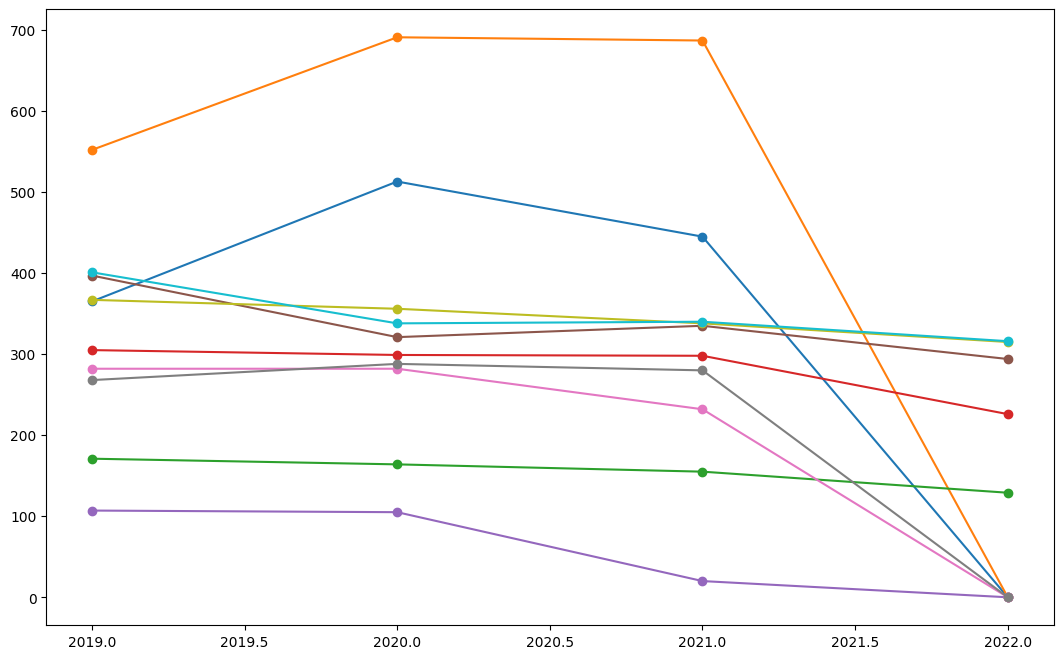

In [56]:
# plt.plot(pivot_table.index,pivot_table['Aberdeenshire'])
# plt.plot(pivot_table.index,pivot_table['Adur'])
# plt.plot(pivot_table.index,pivot_table['Allerdale'])
# plt.plot(pivot_table.index,pivot_table['Alnwick'])
# plt.plot(pivot_table.index,pivot_table['Amber Valley'])
# plt.plot(pivot_table.index,pivot_table['Angus'])
# plt.plot(pivot_table.index,pivot_table['Argyll and Bute'])
# plt.plot(pivot_table.index,pivot_table['Arun'])
count = 0
for x in pivot_table:
    count += 1
    plt.plot(pivot_table.index,pivot_table[x], label = x, marker= 'o')
    if count == 10:
        break
        
plt.gcf().set_size_inches(13,8)    
plt.plot
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

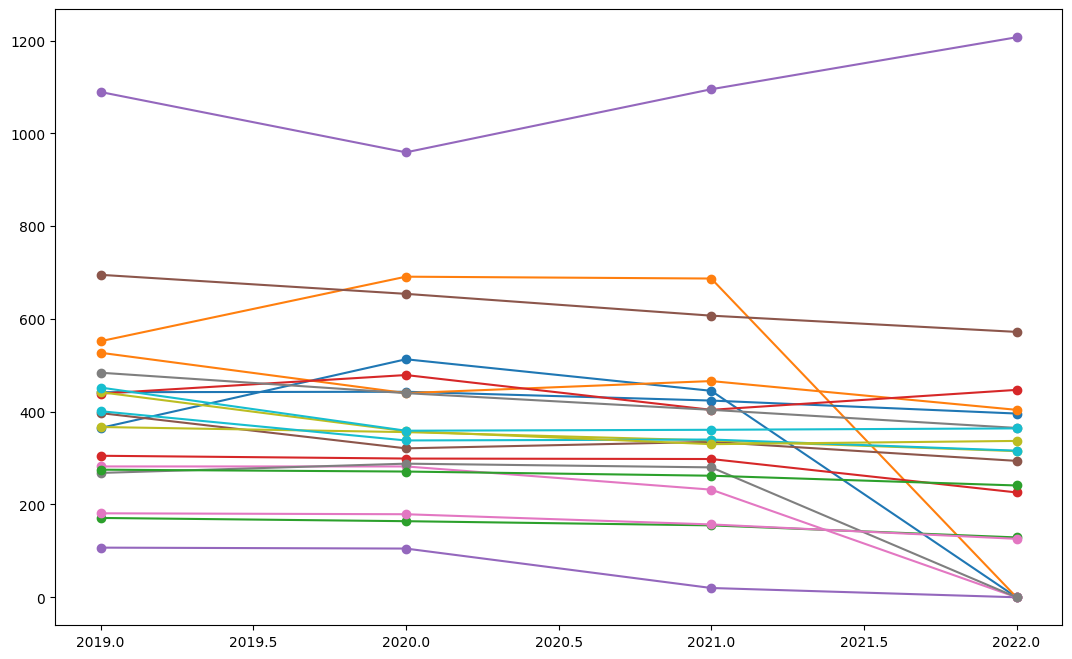

In [55]:
count = 0
for x in pivot_table:
    count += 1
    plt.plot(pivot_table.index,pivot_table[x], label = x, marker= 'o')
    if count == 20:
        break
        
plt.gcf().set_size_inches(13,8)    
plt.plot
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

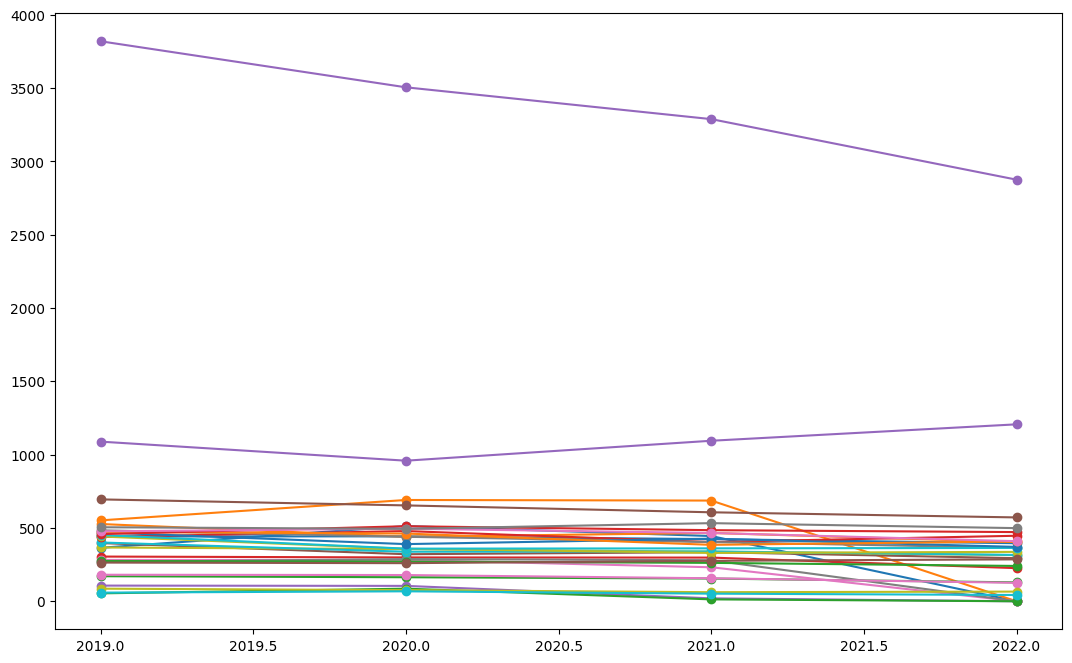

In [63]:
count = 0
for x in pivot_table:
    count += 1
    plt.plot(pivot_table.index,pivot_table[x], label = x, marker= 'o')
    if count == 30:
        break
        
plt.gcf().set_size_inches(13,8)    
plt.plot
plt.plot
plt.show